[(1.126597013446568, '8'), (1.1181569171320962, '4'), (1.1026952380701622, '1'), (1.1390572542552628, '11'), (1.1184533421739145, '5'), (1.150218316818775, '14'), (1.1199143029570322, '6'), (1.1102413839320053, '3'), (1.1100144656993676, '2'), (1.1227046343815725, '7'), (1.1090204530547658, '15'), (1.1280610644138138, '9'), (1.1413179182378295, '13'), (1.1410981425858495, '12'), (1.1364316110486063, '10'), (1.130322379054274, '18'), (1.14855689644245, '17'), (1.1180945336189614, '16'), (1.1741218336266932, '\\N')]


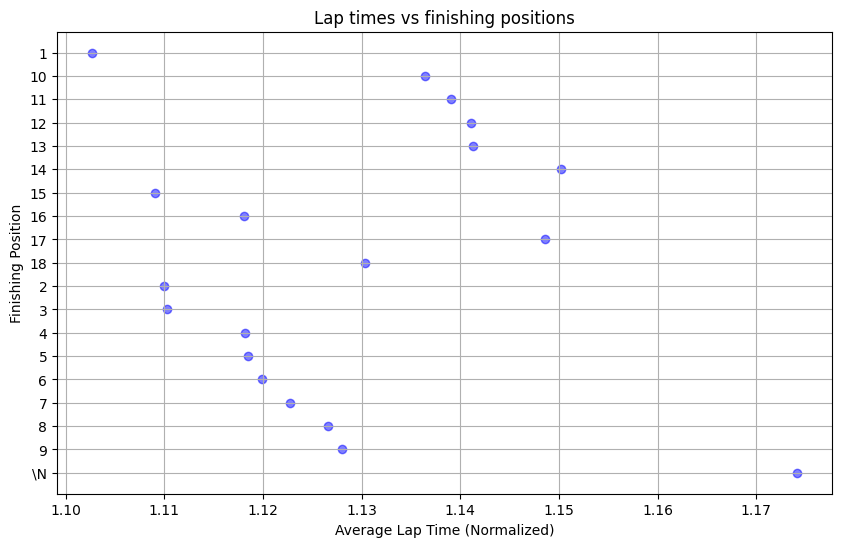

In [ ]:
import pandas as pd
import time
import matplotlib.pyplot as plt

# Load data
races = pd.read_csv("data/races.csv")
lap_times = pd.read_csv("data/lap_times.csv")
results = pd.read_csv("data/results.csv")

# Iterate through each race
for race_id in races['raceId']:
    plot_data = {}
    race_id += 1  # Increment race ID (if needed)
    
    # Filter lap times and results for the current race
    laptimes_race = lap_times[lap_times['raceId'] == race_id]
    results_race = results[results['raceId'] == race_id]
    amount_of_laps = laptimes_race['lap'].unique().max()
    current_shortest = float('inf')
    
    # Iterate through each lap
    for lap in laptimes_race['lap'].unique():
        driver_laptimes = laptimes_race[laptimes_race['lap'] == lap].sort_values('position')
        driver_laptimes = driver_laptimes.merge(results_race[['driverId', 'position']], on='driverId')
        
        # Update the current shortest lap time
        if driver_laptimes['milliseconds'].min() < current_shortest:
            current_shortest = driver_laptimes['milliseconds'].min()
        
        # Normalize lap times
        driver_laptimes['milliseconds'] /= current_shortest
        driver_laptimes['lap'] /= amount_of_laps
        
        # Collect data for each driver
        for driver_id in driver_laptimes['driverId'].unique():
            driver_data = driver_laptimes[driver_laptimes['driverId'] == driver_id]
            driver_id = int(driver_id)
            if driver_id not in plot_data:
                plot_data[driver_id] = []
            plot_data[driver_id].append(driver_data['milliseconds'].values[0])
    
    # Calculate average normalized lap time for each driver
    for driver_id in plot_data:
        plot_data[driver_id] = float(sum(plot_data[driver_id]) / len(plot_data[driver_id]))
    
    # Get finishing positions
    finishing_positions = results_race[['driverId', 'position']].set_index('driverId').to_dict()['position']
    for driver_id in plot_data:
        if driver_id in finishing_positions:
            plot_data[driver_id] = (plot_data[driver_id], int(finishing_positions[driver_id]))
        else:
            plot_data[driver_id] = (plot_data[driver_id], 20)  # Default position if missing
    
    # Sort the plot data by finishing position
    plot_data = [value for value in plot_data.values()]
    print(plot_data)
    plot_data = sorted(plot_data, key=lambda x: x[1])
    x_values = []
    y_values = []
    # Extract x and y values for plotting
    for nlt, fp in plot_data:
        x_values.append(nlt)
        y_values.append(fp)
 # Finishing positions
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.title("Lap times vs finishing positions")
    plt.xlabel("Average Lap Time (Normalized)")
    plt.ylabel("Finishing Position")
    plt.grid()
    
    # Scatter plot
    plt.scatter(x_values, y_values, c='blue', alpha=0.5)
    
    # Invert the y-axis so 1st position is at the top
    plt.gca().invert_yaxis()
    
    # Show the plot
    plt.show()
    
    # Pause for a moment before processing the next race
    time.sleep(1)
    break